In [ ]:
pip install gensim

In [ ]:
pip install sentence-transformers

# Get the embedding for a word
word_embedding = sentence_model.encode("transformer")

print("Embedding for 'transformer':")
print(word_embedding)
print("Embedding shape:", word_embedding.shape)

In [41]:
import gensim.downloader as gd

model = gd.load("glove-wiki-gigaword-50")

In [72]:
input_word = str.lower('transformer')

input_word = str.lower('transformers')

In [74]:
model[input_word]

array([ 0.11273 , -0.63435 ,  1.7053  ,  0.66786 , -0.24074 ,  0.88832 ,
        0.34316 , -0.69567 , -0.80924 ,  0.20979 ,  0.30329 ,  1.1982  ,
       -0.34908 ,  1.0642  ,  0.61861 ,  0.44422 , -0.15728 ,  1.4748  ,
       -0.74128 , -0.42438 ,  1.3151  , -1.3051  ,  0.044347,  0.85216 ,
        0.16114 ,  0.35864 , -1.4714  , -0.50981 ,  1.1186  ,  0.43503 ,
        0.34347 ,  0.2355  ,  0.40832 , -0.26606 ,  0.19886 ,  1.6235  ,
       -0.040643, -1.6374  , -0.53244 , -0.41529 ,  0.065722,  0.26872 ,
       -0.90581 , -0.43439 , -0.83916 ,  1.3158  ,  0.43247 , -0.032805,
        0.11869 , -1.0665  ], dtype=float32)

In [75]:
model.most_similar(input_word)

[('marvel', 0.6924198269844055),
 ('dc', 0.6921221613883972),
 ('multiverse', 0.6699224710464478),
 ('toyline', 0.6696303486824036),
 ('wildstorm', 0.654568612575531),
 ('energon', 0.6542315483093262),
 ('reboot', 0.6522085666656494),
 ('superman', 0.6499139666557312),
 ('universes', 0.6458134055137634),
 ('cybertron', 0.6435686349868774)]

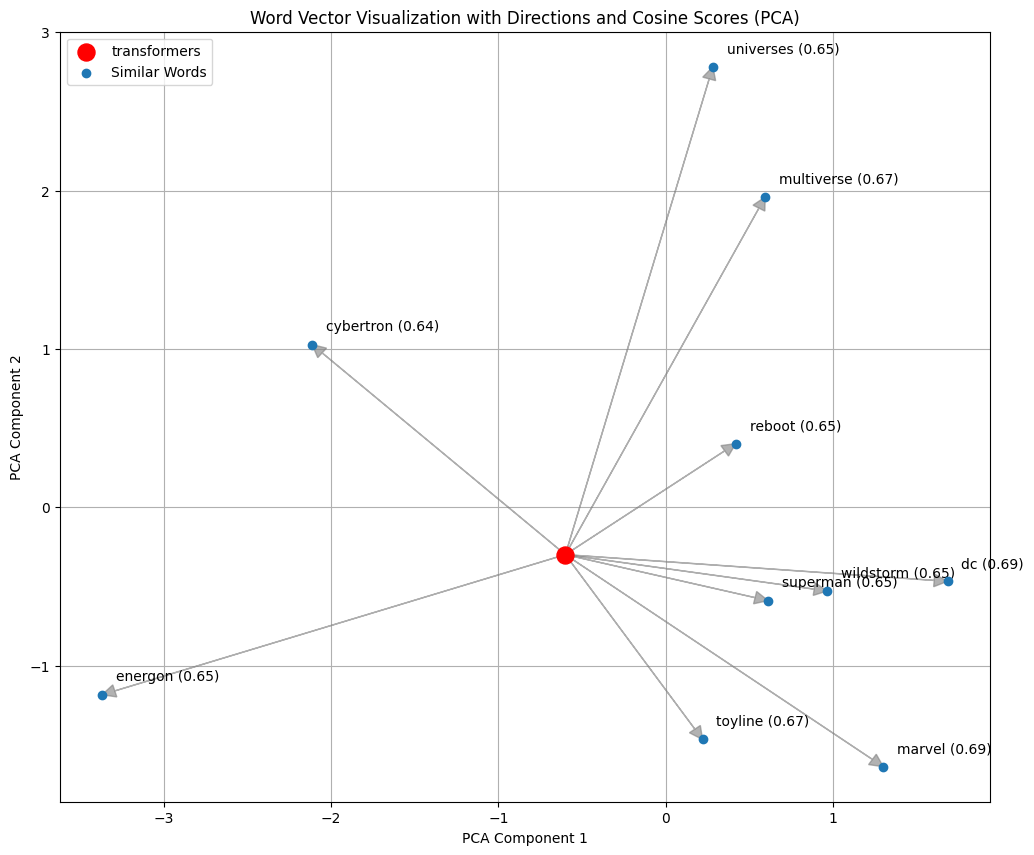

In [76]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import gensim.downloader as gd


# Get the most similar words to 'tower'
most_similar_words = model.most_similar(input_word)

# Extract the words from the output
words_for_viz = [word for word, similarity in most_similar_words]

# Add 'tower' to the list of words for visualization
words_for_viz.append(input_word)

# Get the vectors for the selected words
vectors_for_viz = np.array([model[word] for word in words_for_viz])

# Select a few words for visualization
words = words_for_viz

# Get the vectors for the selected words
vectors = vectors_for_viz

# Reduce dimensionality to 2 using PCA
pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors)

# Plot the vectors
plt.figure(figsize=(12, 10)) # Increased figure size for better readability

# Find the index of the input word
if input_word in words:
    input_word_index = words.index(input_word)
    # Plot the input word with a different color/marker
    plt.scatter(vectors_pca[input_word_index, 0], vectors_pca[input_word_index, 1], color='red', s=150, label=input_word, zorder=5) # Increased size and zorder

    # Plot the other words
    other_word_indices = [i for i in range(len(words)) if i != input_word_index]
    plt.scatter(vectors_pca[other_word_indices, 0], vectors_pca[other_word_indices, 1], label='Similar Words', zorder=4)

    # Draw arrows from the input word to the similar words and add similarity scores
    for i in other_word_indices:
        # Calculate cosine similarity
        similarity = model.similarity(input_word, words[i])

        plt.arrow(vectors_pca[input_word_index, 0], vectors_pca[input_word_index, 1],
                  vectors_pca[i, 0] - vectors_pca[input_word_index, 0],
                  vectors_pca[i, 1] - vectors_pca[input_word_index, 1],
                  head_width=0.08, head_length=0.08, fc='gray', ec='gray', length_includes_head=True, alpha=0.6, zorder=3) # Increased head size and alpha

        # Add word labels and similarity scores
        plt.annotate(f"{words[i]} ({similarity:.2f})",
                     (vectors_pca[i, 0], vectors_pca[i, 1]),
                     textcoords="offset points", xytext=(10, 10), ha='left')

else:
    # If the input word is not in the list, just plot all words
    plt.scatter(vectors_pca[:, 0], vectors_pca[:, 1])
    # Add word labels
    for i, word in enumerate(words):
        plt.annotate(word, (vectors_pca[i, 0], vectors_pca[i, 1]))


plt.title('Word Vector Visualization with Directions and Cosine Scores (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()